In [180]:
import pandas as pd
import numpy as np

In [181]:
data=pd.read_csv('haberman.csv')
data.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [182]:
data.shape

(305, 4)

In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   30      305 non-null    int64
 1   64      305 non-null    int64
 2   1       305 non-null    int64
 3   1.1     305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [184]:
data.describe()

,30,64,1,1.1
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


Attribute Information:
   1. Age of patient at time of operation (numerical)
   2. Patient's year of operation (year - 1900, numerical)
   3. Number of positive axillary nodes detected (numerical)
   4. Survival status (class attribute)
         1 = the patient survived 5 years or longer
         2 = the patient died within 5 year


In [185]:
data.columns.values

array(['30', '64', '1', '1.1'], dtype=object)

In [186]:
x=data[['30', '64', '1']]
y=data['1.1']

In [187]:
x.shape

(305, 3)

In [188]:
y.shape

(305,)

In [189]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [190]:
from keras.models import Sequential
from keras.layers import Dense
def create_model():
    model=Sequential()
    model.add(Dense(10,activation='relu',input_dim=3))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')
    return model

In [191]:
model=create_model()
model.summary()


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 10)                40        
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 11        
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [192]:
history=model.fit(x_train,y_train,epochs=200,validation_data=(x_test,y_test))

Epoch 1/200
7/7 [==============================] - 0s 19ms/step - loss: 28.9427 - accuracy: 0.0000e+00 - val_loss: 25.3797 - val_accuracy: 0.0000e+00
Epoch 2/200
7/7 [==============================] - 0s 3ms/step - loss: 24.1684 - accuracy: 0.0000e+00 - val_loss: 20.7868 - val_accuracy: 0.0000e+00
Epoch 3/200
7/7 [==============================] - 0s 3ms/step - loss: 19.2107 - accuracy: 0.0000e+00 - val_loss: 16.1151 - val_accuracy: 0.0109
Epoch 4/200
7/7 [==============================] - 0s 3ms/step - loss: 14.3168 - accuracy: 0.0282 - val_loss: 11.4347 - val_accuracy: 0.0435
Epoch 5/200
7/7 [==============================] - 0s 3ms/step - loss: 9.6173 - accuracy: 0.1127 - val_loss: 7.1231 - val_accuracy: 0.1739
Epoch 6/200
7/7 [==============================] - 0s 3ms/step - loss: 5.3975 - accuracy: 0.2160 - val_loss: 3.6087 - val_accuracy: 0.2935
Epoch 7/200
7/7 [==============================] - 0s 4ms/step - loss: 2.1590 - accuracy: 0.3709 - val_loss: 1.0472 - val_accuracy: 0.467

In [193]:
score=model.evaluate(x_test,y_test)
print(score*100)

3/3 [==============================] - 0s 1ms/step - loss: -728.2274 - accuracy: 0.7826
[-728.2274169921875, 0.782608687877655, -728.2274169921875, 0.782608687877655, -728.2274169921875, 0.782608687877655, -728.2274169921875, 0.782608687877655, -728.2274169921875, 0.782608687877655, -728.2274169921875, 0.782608687877655, -728.2274169921875, 0.782608687877655, -728.2274169921875, 0.782608687877655, -728.2274169921875, 0.782608687877655, -728.2274169921875, 0.782608687877655, -728.2274169921875, 0.782608687877655, -728.2274169921875, 0.782608687877655, -728.2274169921875, 0.782608687877655, -728.2274169921875, 0.782608687877655, -728.2274169921875, 0.782608687877655, -728.2274169921875, 0.782608687877655, -728.2274169921875, 0.782608687877655, -728.2274169921875, 0.782608687877655, -728.2274169921875, 0.782608687877655, -728.2274169921875, 0.782608687877655, -728.2274169921875, 0.782608687877655, -728.2274169921875, 0.782608687877655, -728.2274169921875, 0.782608687877655, -728.227416992

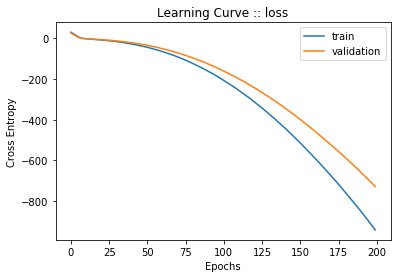

In [194]:
from matplotlib import pyplot

pyplot.title('Learning Curve :: loss')
pyplot.xlabel('Epochs')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'],label='train')
pyplot.plot(history.history['val_loss'],label='validation')
pyplot.legend()
pyplot.show()